In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay
import re
import string
from sklearn.ensemble import RandomForestClassifier


In [ ]:
import pandas as pd

# Try reading the CSV file with different encodings
try:
    df = pd.read_csv('train.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('train.csv', encoding='latin1')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv('train.csv', encoding='ISO-8859-1')
        except UnicodeDecodeError:
            df = pd.read_csv('train.csv', encoding='utf-16')

# Repeat the same for the test file
try:
    f = pd.read_csv('test.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        f = pd.read_csv('test.csv', encoding='latin1')
    except UnicodeDecodeError:
        try:
            f = pd.read_csv('test.csv', encoding='ISO-8859-1')
        except UnicodeDecodeError:
            f = pd.read_csv('test.csv', encoding='utf-16')


In [ ]:
print(df.shape)
print(df.info())
df.head()

(27481, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB
None


,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [ ]:
df.dropna(inplace=True)
f.dropna(inplace=True)

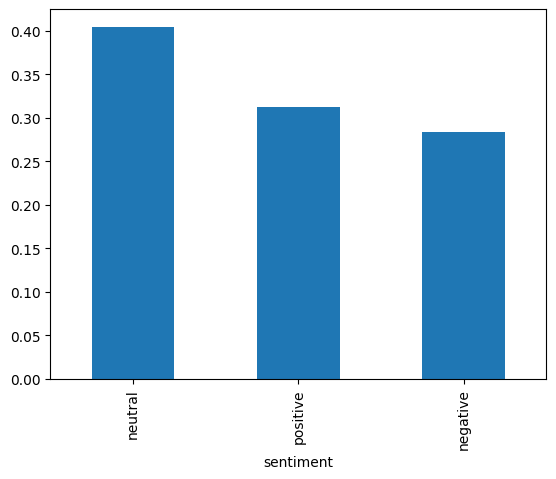

In [ ]:
df['sentiment'].value_counts(normalize=True).plot(kind='bar');

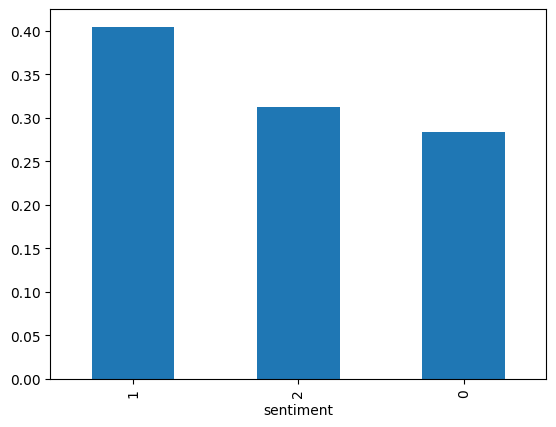

In [ ]:
# Converting sentiment column to categorical variable
df['sentiment'] = df['sentiment'].astype('category').cat.codes
df['sentiment'].value_counts(normalize=True).plot(kind='bar')
f['sentiment'] = f['sentiment'].astype('category').cat.codes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27480 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27480 non-null  int8   
 4   Time of Tweet     27480 non-null  object 
 5   Age of User       27480 non-null  object 
 6   Country           27480 non-null  object 
 7   Population -2020  27480 non-null  int64  
 8   Land Area (Km²)   27480 non-null  float64
 9   Density (P/Km²)   27480 non-null  int64  
dtypes: float64(1), int64(2), int8(1), object(6)
memory usage: 2.1+ MB


In [ ]:
df.drop(columns=['textID','Time of Tweet', 'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'])
f.drop(columns=['textID','Time of Tweet', 'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'])

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,1
1,Shanghai is also really exciting (precisely -...,2
2,"Recession hit Veronique Branquinho, she has to...",0
3,happy bday!,2
4,http://twitpic.com/4w75p - I like it!!,2
...,...,...
3529,"its at 3 am, im very tired but i can`t sleep ...",0
3530,All alone in this old house again. Thanks for...,2
3531,I know what you mean. My little dog is sinkin...,0
3532,_sutra what is your next youtube video gonna b...,2


In [ ]:
def wp(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df['selected_text'] = df["selected_text"].apply(wp)
f['text'] = f['text'].apply(wp)

In [ ]:
X_train = df['selected_text']
y_train = df['sentiment']
X_test = f['text']
y_test = f['sentiment']

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(27480,)
(3534,)
(27480,)
(3534,)


In [ ]:
vectorization = CountVectorizer()
XV_train = vectorization.fit_transform(X_train)
XV_test = vectorization.transform(X_test)
print(XV_train)

  (0, 6480)	1
  (0, 11961)	1
  (0, 7072)	1
  (0, 15875)	1
  (0, 5954)	1
  (1, 13329)	1
  (1, 12298)	1
  (2, 2005)	1
  (2, 8944)	1
  (3, 8944)	1
  (3, 8196)	1
  (3, 399)	1
  (4, 13320)	1
  (4, 10060)	1
  (5, 6930)	1
  (5, 16276)	1
  (5, 4176)	1
  (5, 2893)	1
  (5, 13167)	1
  (5, 13292)	1
  (5, 12713)	1
  (5, 10954)	1
  (5, 5404)	1
  (5, 14416)	1
  (5, 1386)	1
  :	:
  (27473, 39)	1
  (27474, 4635)	1
  (27475, 8536)	1
  (27476, 4140)	1
  (27476, 5408)	1
  (27477, 10060)	1
  (27477, 5404)	1
  (27477, 1744)	1
  (27477, 16459)	1
  (27477, 16352)	1
  (27477, 5970)	1
  (27478, 15727)	1
  (27478, 7435)	2
  (27478, 2059)	1
  (27478, 16213)	1
  (27479, 5954)	1
  (27479, 14416)	1
  (27479, 10155)	1
  (27479, 14473)	1
  (27479, 367)	1
  (27479, 16352)	1
  (27479, 6951)	1
  (27479, 13172)	1
  (27479, 5310)	1
  (27479, 854)	1


In [ ]:
score_baseline = df['sentiment'].value_counts(normalize=True).max()
score_baseline

0.40454876273653567

In [ ]:
rf = RandomForestClassifier()
rf.fit(XV_train, y_train)

RandomForestClassifier()

In [ ]:
pred_rf=rf.predict(XV_test)

In [ ]:
score_rf=rf.score(XV_test,y_test)
score_rf

0.5274476513865308

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix_rf=confusion_matrix(y_test,pred_rf)
def print_confusion_matrix(confusion_matrix):
    cm_str = np.array2string(confusion_matrix, separator=', ')
    print("Confusion Matrix:")
    print(cm_str)

print_confusion_matrix(conf_matrix_rf)

Confusion Matrix:
[[ 257,  731,   13],
 [ 118, 1249,   63],
 [  33,  712,  358]]


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_title'

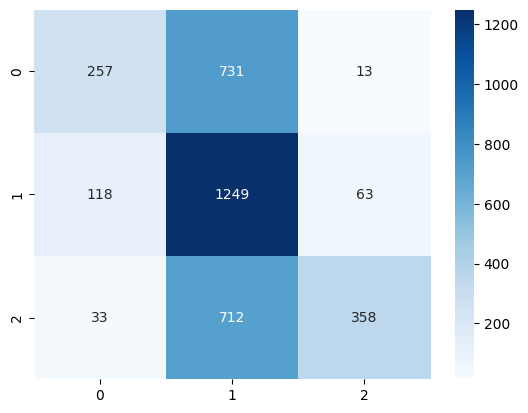

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.set_title(title)
plt.set_xlabel('Predicted Class')
plt.set_ylabel('Actual Class')
plt.plot()

In [ ]:
def output_lable(n):
    if n == 0:
        return "The Text Sentement is Negative"
    elif n == 1:
        return "The Text Sentement is Neutral"
    elif n == 2:
        return "The Text Sentement is Positive"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wp)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_rf = rf.predict(new_xv_test)
    return print((output_lable(pred_rf[0])))

In [ ]:
text = "i am sad"
manual_testing(text)

The Text Sentement is Negative
